In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv')
data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [3]:
data.shape

(188318, 132)

In [4]:
data.isnull().sum().sum()

0

In [5]:
data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [7]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [9]:
import re
cat_pattern = re.compile("^cat([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")
cont_pattern = re.compile("^cont([1-9]|[1-9][0-9]|[1-9][0-9][0-9])$")
cat_col = sorted([cat for cat in data_train.columns if 'cat' in cat], key=lambda s: int(s[3:]))
cat_col

['cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9',
 'cat10',
 'cat11',
 'cat12',
 'cat13',
 'cat14',
 'cat15',
 'cat16',
 'cat17',
 'cat18',
 'cat19',
 'cat20',
 'cat21',
 'cat22',
 'cat23',
 'cat24',
 'cat25',
 'cat26',
 'cat27',
 'cat28',
 'cat29',
 'cat30',
 'cat31',
 'cat32',
 'cat33',
 'cat34',
 'cat35',
 'cat36',
 'cat37',
 'cat38',
 'cat39',
 'cat40',
 'cat41',
 'cat42',
 'cat43',
 'cat44',
 'cat45',
 'cat46',
 'cat47',
 'cat48',
 'cat49',
 'cat50',
 'cat51',
 'cat52',
 'cat53',
 'cat54',
 'cat55',
 'cat56',
 'cat57',
 'cat58',
 'cat59',
 'cat60',
 'cat61',
 'cat62',
 'cat63',
 'cat64',
 'cat65',
 'cat66',
 'cat67',
 'cat68',
 'cat69',
 'cat70',
 'cat71',
 'cat72',
 'cat73',
 'cat74',
 'cat75',
 'cat76',
 'cat77',
 'cat78',
 'cat79',
 'cat80',
 'cat81',
 'cat82',
 'cat83',
 'cat84',
 'cat85',
 'cat86',
 'cat87',
 'cat88',
 'cat89',
 'cat90',
 'cat91',
 'cat92',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat97',
 'cat98',
 'cat99',
 'cat100',
 'cat101

In [10]:
cat_index = [i for i in range(0, len(data_train.columns)) if cat_pattern.match(data_train.columns[i])]
cat_index

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116]

In [11]:
cont_col = sorted([cont for cont in data_train.columns if 'cont' in cont], key=lambda s: int(s[4:]))
cont_col

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

In [12]:
cont_index = [i for i in range(0, len(data_train.columns)) if cont_pattern.match(data_train.columns[i])]
cont_index

[117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130]

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

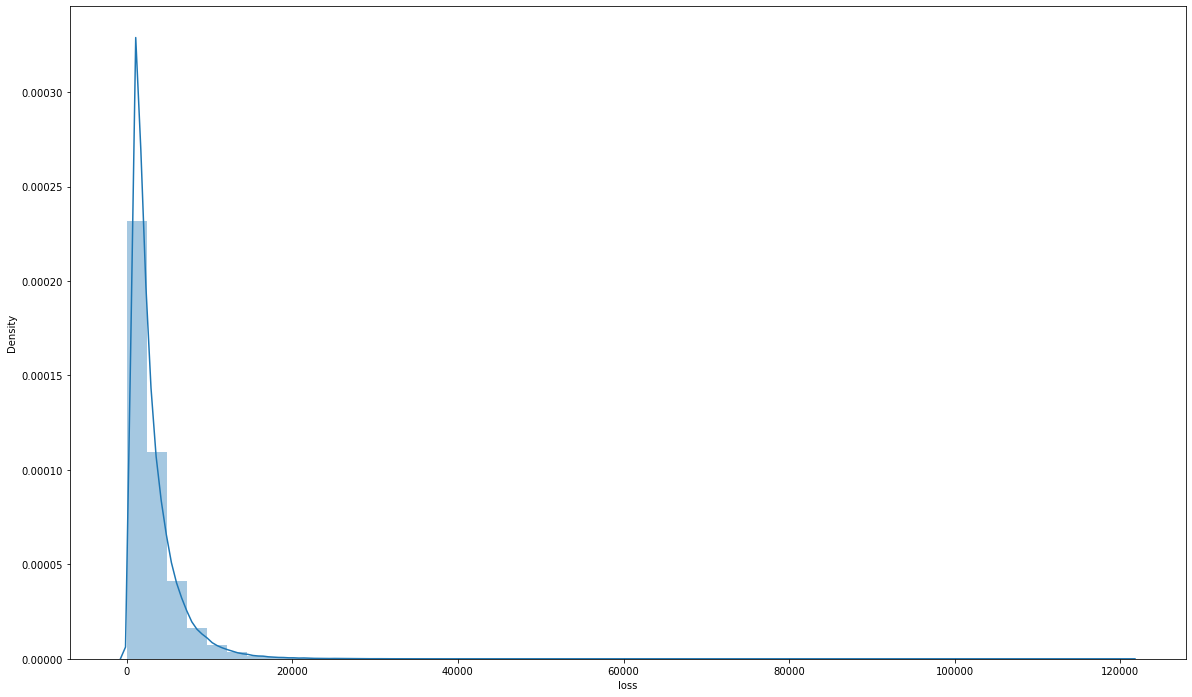

In [14]:
plt.figure(figsize=(20, 12))
sns.distplot(data_train['loss'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

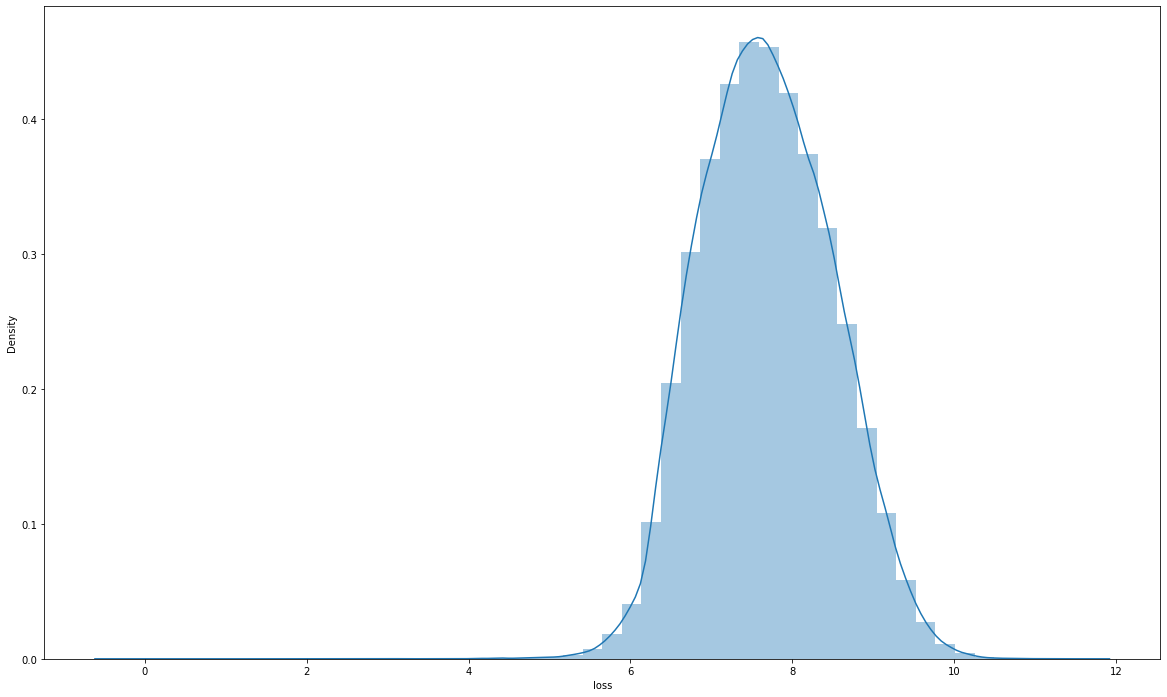

In [15]:
plt.figure(figsize=(20, 12))
sns.distplot(np.log(data_train['loss']))

In [16]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [18]:
model = CatBoostRegressor(iterations=200, learning_rate=0.05, depth=6, eval_metric='MAE', verbose=10, task_type='GPU', save_snapshot=True, snapshot_file='masoud', snapshot_interval=10)

In [20]:
X = data_train.drop(['id', 'loss'], axis=1)
y = np.log(data_train['loss'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2343)

In [21]:
del X
del y

In [22]:
del data_train

In [23]:
np.asarray(cat_index) - 1

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115])

In [25]:
model.fit(X_train, y_train, np.asarray(cat_index) - 1, eval_set=(X_test, y_test))

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 0.6480157	test: 0.6454934	best: 0.6454934 (0)	total: 335ms	remaining: 1m 6s
10:	learn: 0.5611995	test: 0.5590003	best: 0.5590003 (10)	total: 3.41s	remaining: 58.6s
20:	learn: 0.5167076	test: 0.5147035	best: 0.5147035 (20)	total: 6.68s	remaining: 57s
30:	learn: 0.4909347	test: 0.4889671	best: 0.4889671 (30)	total: 10.2s	remaining: 55.6s
40:	learn: 0.4746289	test: 0.4727737	best: 0.4727737 (40)	total: 13.7s	remaining: 53.1s
50:	learn: 0.4632477	test: 0.4613392	best: 0.4613392 (50)	total: 17.3s	remaining: 50.5s
60:	learn: 0.4546789	test: 0.4530637	best: 0.4530637 (60)	total: 20.8s	remaining: 47.5s
70:	learn: 0.4490307	test: 0.4475347	best: 0.4475347 (70)	total: 24.5s	remaining: 44.4s
80:	learn: 0.4444255	test: 0.4431379	best: 0.4431379 (80)	total: 27.9s	remaining: 41s
90:	learn: 0.4409491	test: 0.4398392	best: 0.4398392 (90)	total: 31.7s	remaining: 37.9s
100:	learn: 0.4382162	test: 0.4372973	best: 0.4372973 (100)	total: 35.1s	remaining: 34.4s
110:	learn: 0.4360396	test: 0.435270

In [27]:
np.exp(0.4263377)

1.5316379219343326

In [28]:
model.save_model('catboost_reg.h5')

In [39]:
# MasoudKaviani.ir